# 1. Introduction to the Problem

A breast cancer dataset was given to perform a classification problem to predict whether a certain patient has cancer or not. 

The features in the dataset are listed below:

* **Cl.thickness**: Clump Thickness
* **Cell.size**: Uniformity of Cell Size
* **Cell.shape**: Uniformity of Cell Shape
* **Marg.adhesion**: Marginal Adhesion
* **Epith.c.size**: Single Epithelial Cell Size
* **Bare.nuclei**: Bare Nuclei
* **Bl.cromatin**: Bland Chromatin
* **Normal.nucleoli**: Normal Nucleoli
* **Mitoses**: Mitoses

The label to use for our prediction is:

* **Class**: Class (Benign or Malignant)

Moreover, the classifaction models to be used in this problem are **Logistic Regression** and **Naïve Bayes**.

1. **Logistic Regression**: Logistic Regression is a supervised-learning techniques, which is mostly used in classification problems. The model predict the variables based on a logistic function which classifiy if a certain variable is above or below a specific threshold. [9]
    - There are three types of Logistic Regression: 
        1. **Binary**: Predicting 2 possible outcomes.
        2. **Multinomial**: Predicting 3 or more possible outcomes without order.
        3. **Ordinal**: Predicting 3 or more possible outcomes with order.


2. **Naïve Bayes**: Naïve Bayes is a supervised-learning technique, which is also used in classifictaion problems but based on probabilty. Using Bayes Theorem, the probabilty of certain features is calculated to predict the output. [8]
    - There are three types of Naïve Bayes Classifier: 
        1. **Multinomial**: Used mostly in text classification NLP where features follow a Multinomial Distribution.
        2. **Bernoulli**: Features follow a Bernoulli Distribution, in which features are binary values.
        3. **Gaussian**: Features follow a Normal Distribution.
        
Thereofore, in the following task, **Binary Logistic Regression** and **Gaussian Naïve Bayes classification** are used.

# 2. Importing Libraries

The libraries used in this notebook are:

* For working with arrays: 
    * **Numpy**

* For visulization and plotting figures:
    * **Matplotlib**
    * **Seaborn**

* For working with data:
    * **Pandas**

* For machine learning and statistical modeling:
    * **Sklearn** (scikit-learn)
    

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#!pip install seaborn
import seaborn as sns
import pandas as pd

#!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold   # for K-fold cross validation
from sklearn.model_selection import cross_validate # for K-fold cross validation
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.preprocessing import MinMaxScaler # for feature scaling

from sklearn.linear_model import LogisticRegression # for Logistic Regression
from sklearn.naive_bayes import GaussianNB # for Naive Bayes Algorithm

from sklearn import metrics
from sklearn.metrics import confusion_matrix

np.random.seed(99)

# 3. Load Data from CSV File

The CSV file "cancerdata.csv" was downloaded from SurreyLearn and placed in the same directory as the notebook.

The first 5 rows are shown below as a dataframe to understand and get a first look on the data.

In [2]:
# Load CSV file
cancer_data = pd.read_csv('cancerdata.csv')
cancer_data.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0
1,4.454847,4.637212,4.603958,5.742196,7.896027,8.074609,3.582104,3.344739,3.199268,0
2,2.824082,2.386095,2.295170,2.530536,2.723036,3.025014,3.582104,2.591299,3.199268,0
3,5.270230,7.638702,7.682342,2.530536,3.757634,4.287413,3.582104,7.111938,3.199268,0
4,3.639465,2.386095,2.295170,4.136366,2.723036,2.393815,3.582104,2.591299,3.199268,0


The columns in the csv file are shown below to get a brief look on all the columns in the file and try to get a view on the features and the label "Class".

In [3]:
cancer_data.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

```len()``` was used to see how many rows are there in the dataframe. 

In [4]:
len(cancer_data)

683

# 4. Get Insights & Explore Data

In this section, the data from the CSV file is more explored in order to gather more insights about the data and try to find any anomalies. This will help in getting better results for the classifiers.

## 4.1. Check Datatypes of Cancer Data

First, the datatypes of the cancer data is checked to see if anything might cause a problem later on.

In [5]:
cancer_data.dtypes

Cl.thickness       float64
Cell.size          float64
Cell.shape         float64
Marg.adhesion      float64
Epith.c.size       float64
Bare.nuclei        float64
Bl.cromatin        float64
Normal.nucleoli    float64
Mitoses            float64
Class                int64
dtype: object

From the datatypes shown above, it is seen that all the features are float datatypes, and the label "Class" is of int datatype. This will not cause any problems, since all the data is numeric or ordinal. There are no strings or boolean values, so cleaning and mapping data wont be needed in this notebook.  

## 4.2. Look for Nulls and Unique Values

Second, the data is checked for any null values that might affect the classification problem.

In [6]:
cancer_data.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

The label "class" is checked for unique value to make sure that this is a binary classification.

In [7]:
cancer_data.Class.unique()

array([0, 1], dtype=int64)

It is deduced that the data is clean (no missing values) and the label values are unique (either 0 or 1)
    
<span style="color:green">0 stands for benign (no cancer detected)</span>
   
<span style="color:red">1 stands for malignant (cancer detected)</span>

## 4.3. Statistics from Cancer Data

A statistics table is shown below to get a better understnding of the numbers in the data. 

In the table below, that statistics shown are:

* **Count**: count the number of rows in the column specified.
* **Mean**: get the mean (average) of the values of rows in the column specified.
* **Standard Deviation**: measure how the data is deviated from the mean value.
* **Minimum**: get the minimum value of the rows in the column specified.
* **25% Percentile (First Quartile)**: show the value where 25% of the data is below this value and the rest 75% is above this value.
* **50% Percentile (Median)**: show the value where the data is cut in half.
* **75% Percentile (Third Quartile)**: show the value where 75% of the data is below this value and the rest 25% is above this value.
* **Maximum**: get the maximum value of the rows in the column specified.

In [8]:
cancer_data.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.349927
std,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,0.477296
min,1.193317,2.386095,2.295170,2.530536,1.688438,2.393815,1.704320,2.591299,3.199268,0.000000
25%,2.008699,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212,2.591299,3.199268,0.000000
50%,3.639465,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104,2.591299,3.199268,0.000000
75%,5.270230,5.387585,5.373554,4.939281,4.792233,5.549811,5.459887,4.851618,3.199268,1.000000
max,8.531761,9.139446,9.221535,9.756771,10.999821,8.074609,10.154346,9.372257,15.146119,1.000000


## 4.4. Count Values of Label "Class"

The number of patients that are either benign or maligant is plotted below. This is done to visulize the the output of the real data before using the classification models.

In [9]:
cancer_data['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

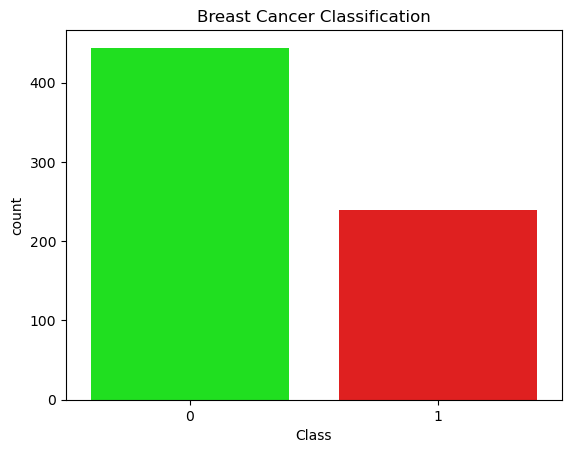

In [10]:
sns.countplot(x=cancer_data['Class'], label = 'Count', palette=['#00FF00','#FF0000']).set(title='Breast Cancer Classification')
plt.show()

It is shown that the 444 patients are benign and 239 patients are malignant.  

## 4.5. Look for Effect of Features on Label "Class"

In this notebook, not all columns will be used in the classification model. Using all models might show a very high accuracy and will lead to overfitting. In order to know which columns will be chosen as features in the models, a study on the effect of features on the label 'Class' is implemented.

First the label 'Class' is split into benign and malignant data.

In [11]:
features_list=list(cancer_data.columns[0:9])

# Split data into benign and malignant data
benign_data = cancer_data[cancer_data['Class'] == 0]
malignant_data = cancer_data[cancer_data['Class'] == 1]

To plot the effect of features on 'Class', a histogram for every feature is plotted that shows how the benign and malignant data is varying as the feature is getting larger. For example, in the first plot below, as the Cl.thickness is increasing from around 1.5 to 8.5, the malignant data (frequency: number of occurences) is increasing. It is therefore deduced that 'Cl.thickness' has huge effect or impact on the outcome label 'Class'.

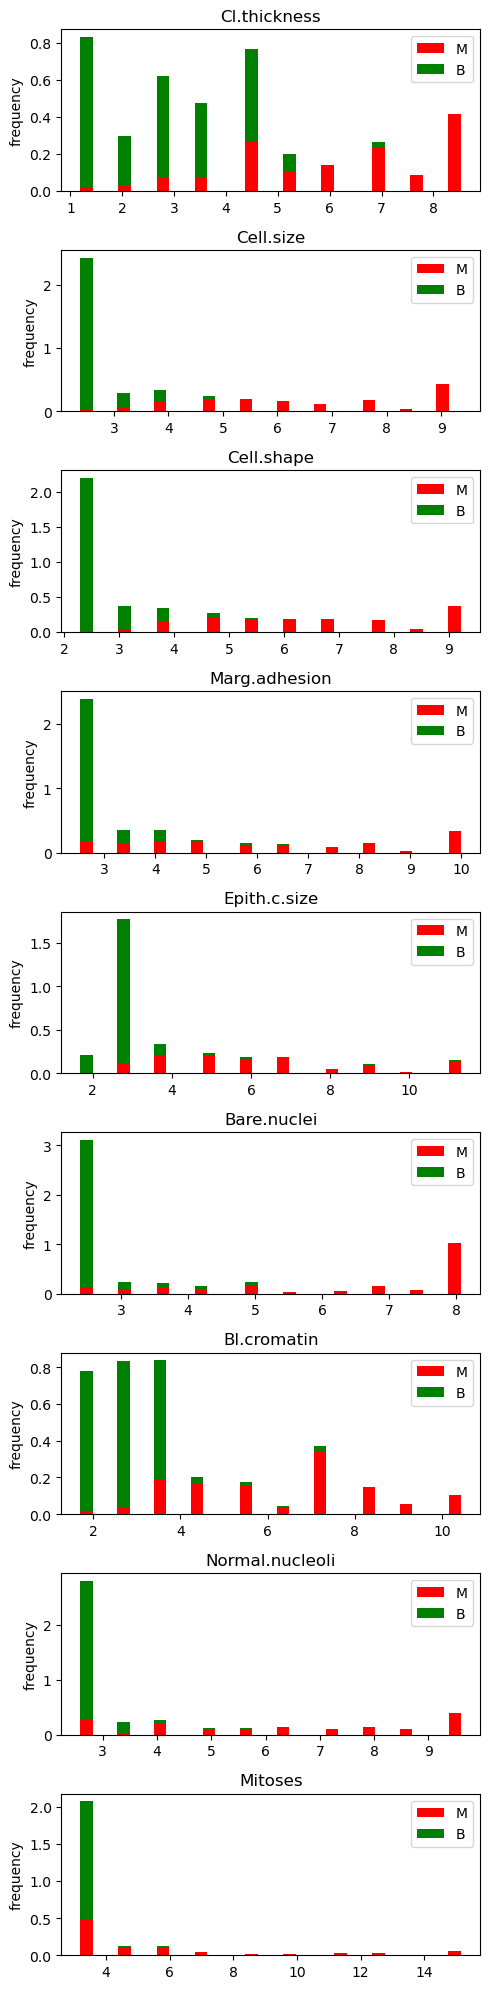

In [12]:
nb_of_bins=30
fig, axs = plt.subplots(9, 1, figsize=(5,20), tight_layout=True)
for i,ax in enumerate(axs):
    MIN = min(cancer_data[features_list[i]])
    MAX = max(cancer_data[features_list[i]])
    binwidth = (MAX-MIN)/nb_of_bins # binwidth is dividing max-min over nb of bins
    ax.hist([malignant_data[features_list[i]], benign_data[features_list[i]]], bins = np.arange(MIN, MAX + binwidth, binwidth), stacked=True, density=True, label=['M', 'B'], color=['r','g'])
    ax.set_title(features_list[i])
    ax.set_ylabel('frequency')
    ax.legend()
plt.show()    

From the plots above, it is deduced that:

1. Cl.thickness, Cell.size, Cell.shape, Marg.adhesion, Epith.c.size, Bare.nuclei, Bl.cromatin, and Normal.nucleoli all showed significant importance for classifying malignant tumors as the values get larger.

2. Mitoses showed little importance for classifying malignant tumors as the values get larger 

Therefore, in the models, the 'Mitoses' column won't be used as it has minimal effect on the output.

A better visualization of the plots can also be implemented with seaborn using a pairplot and hue='Class'. The diagonal of the pairplot below show the same plots but with clearer plots. The rest of the plots in the pairplot (not the diagonal) is ignored as it is not the scope of this task as they show categorical variables or relationships between features. This might be of good use for random forest models.

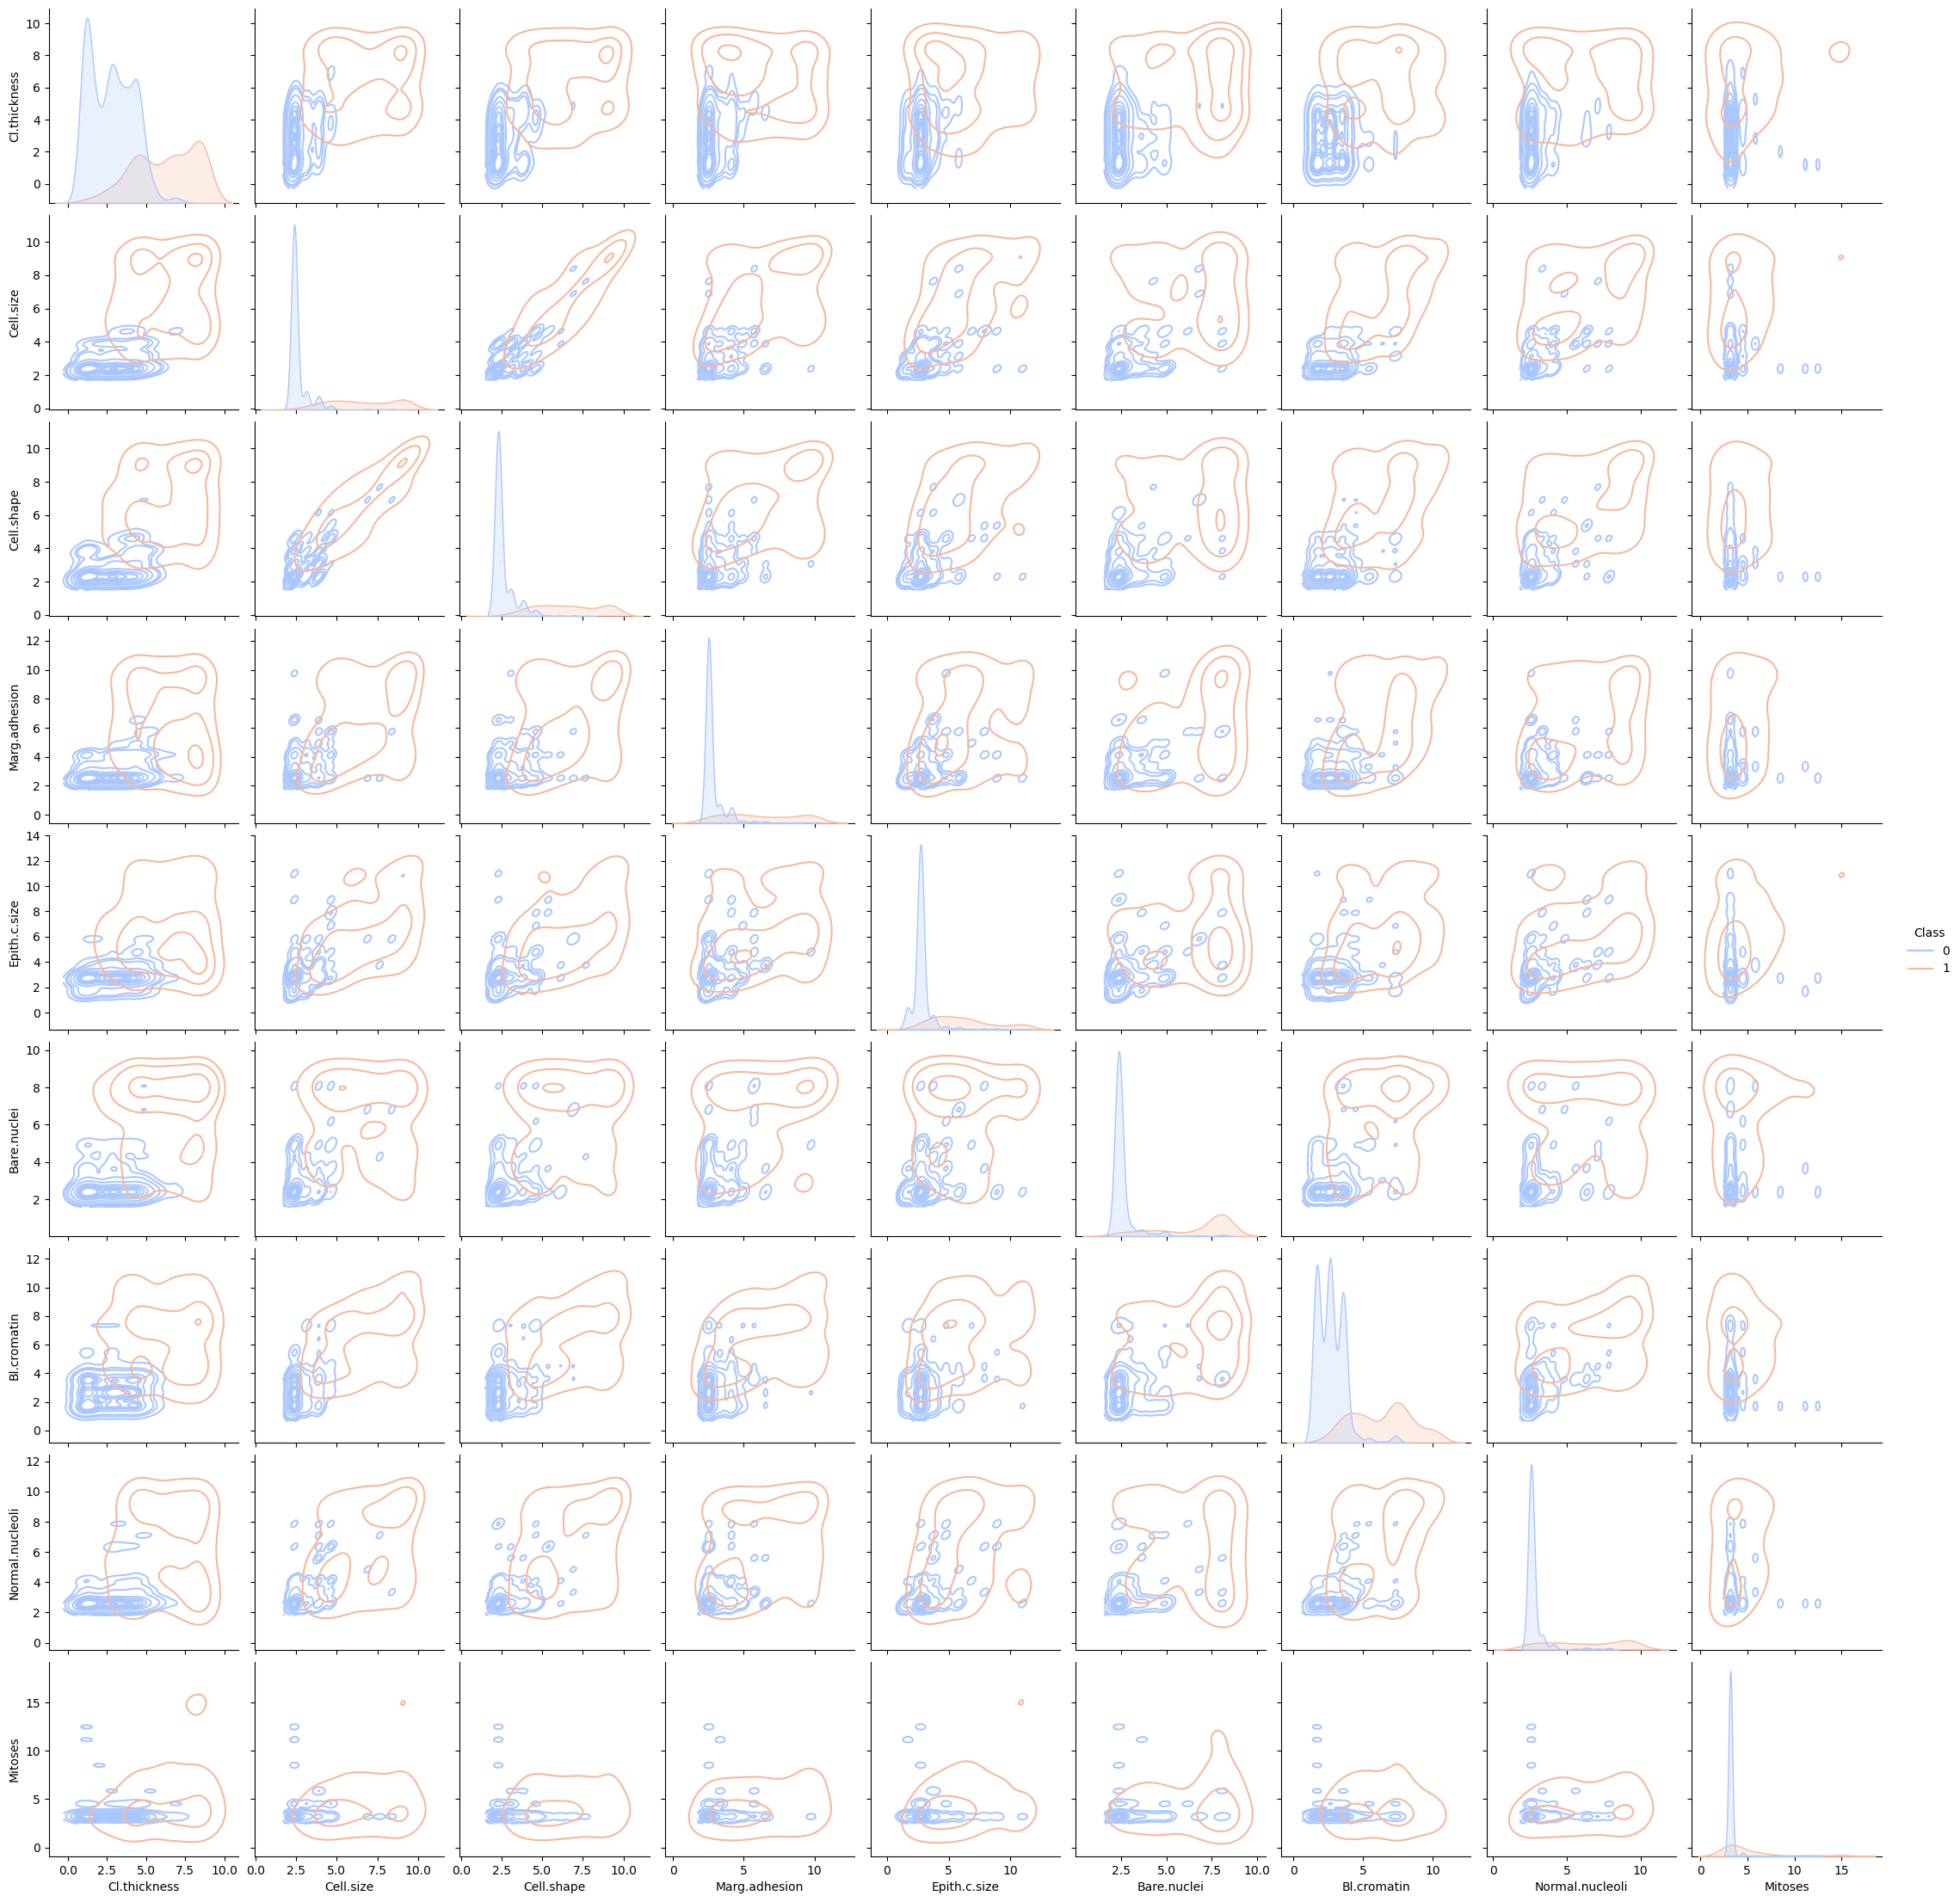

In [13]:
sns.pairplot(cancer_data,hue = 'Class', 
             palette= 'coolwarm', 
             vars = list(cancer_data.columns[0:9]), 
             kind="kde", #kernel density estimate insted of scatter
             )

# 5. Split into Training & Testing data

In this section, the data that will be used in the model is split into training and testing data, so that the model would train on a specific part of the data and test on the rest.

First, the original data is split into features data *X* and label data *Y*, where *X* holds the data of all the columns except *Mitosis* and *Class*, and *Y* holds the data of columnn *Class*

In [14]:
X = cancer_data[list(cancer_data.columns[0:7])] # Last column is removed "Mitoses"
Y = cancer_data['Class'] # Outcome

Using the sklearn ```train_test_split```, the data is split into *x_train*, *x_test*, *y_train*, and *y_test*, where 70% is for training and 30% for testing.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3) # 70%-30% split for train-test

In [16]:
x_train.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin
49,4.454847,3.886840,3.834362,4.939281,2.723036,4.287413,3.582104
312,8.531761,2.386095,2.295170,2.530536,2.723036,8.074609,5.459887
448,3.639465,2.386095,2.295170,2.530536,2.723036,2.393815,1.704320
134,3.639465,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212
157,2.824082,2.386095,2.295170,2.530536,2.723036,2.393815,3.582104


In [17]:
x_test.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin
580,4.454847,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212
334,2.824082,4.637212,4.603958,9.756771,5.826831,2.393815,3.582104
644,1.193317,2.386095,2.295170,2.530536,2.723036,2.393815,2.643212
204,6.900996,9.139446,9.221535,9.756771,5.826831,8.074609,8.276563
412,6.900996,6.888329,7.682342,3.333451,4.792233,3.025014,5.459887


# 6. Scaling Features

In the following section, the data needs to be scaled before using the models to test on datapoints not so different or far from each other. For scaling, the data are scaled using sklearn ```StandardScaler``` and ```MinMaxScaler```.

* ```StandardScaler```: rescale the datapoints to have a mean = 0 and standard deviation = 1. The Scaler subtracts the mean from the datapoint and then divides by the standard deviation. [5]

* ```MinMaxScaler```: rescale the datapoints to be in the range [0,1], or [-1,1] if there are negative numbers. The Scaler divide the difference of the datapoint and the minimum datapoint by the difference of maximum datapoint and minimum datapoint. [4]

## 6.1. Standard Scaler

In [18]:
sc = StandardScaler()
x_train_ss = sc.fit_transform(x_train)
x_test_ss = sc.transform(x_test)

In [19]:
pd.DataFrame(x_train_ss).describe()

,0,1,2,3,4,5,6
count,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,4.780000e+02,478.000000
mean,8.129248e-17,2.787171e-18,-2.006763e-16,9.011852e-17,8.059569e-17,-5.091232e-16,0.000000
std,1.001048e+00,1.001048e+00,1.001048e+00,1.001048e+00,1.001048e+00,1.001048e+00,1.001048
min,-1.245795e+00,-6.881523e-01,-7.342682e-01,-6.284153e-01,-9.888585e-01,-6.828088e-01,-0.987910
25%,-8.909140e-01,-6.881523e-01,-7.342682e-01,-6.284153e-01,-5.236278e-01,-6.828088e-01,-0.575490
50%,-1.811525e-01,-6.881523e-01,-7.342682e-01,-6.284153e-01,-5.236278e-01,-6.828088e-01,-0.163070
75%,5.286090e-01,3.056145e-01,6.394312e-01,9.452696e-02,4.068335e-01,4.292274e-01,0.249350
max,1.948132e+00,2.293148e+00,2.356555e+00,2.624825e+00,3.198217e+00,1.819273e+00,2.723872


In [20]:
pd.DataFrame(x_test_ss).describe()

,0,1,2,3,4,5,6
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,-0.080747,0.081007,0.088276,0.110396,0.168545,0.082055,0.068288
std,1.001165,1.048228,1.083071,1.110272,1.101332,1.040636,1.032460
min,-1.245795,-0.688152,-0.734268,-0.628415,-0.988858,-0.682809,-0.987910
25%,-0.890914,-0.688152,-0.734268,-0.628415,-0.523628,-0.682809,-0.575490
50%,-0.181153,-0.688152,-0.734268,-0.628415,-0.523628,-0.682809,-0.163070
75%,0.528609,0.636870,0.982856,0.455998,0.872064,1.263255,0.661770
max,1.948132,2.293148,2.356555,2.624825,3.198217,1.819273,2.723872


It is seen from the ```x_train_ss``` and ```x_test_ss``` description tables above that the mean is almost 0 and the standard deviation is very close to 1 for all seven columns.

## 6.2. MinMax Scaler

In [21]:
sc = MinMaxScaler()
x_train_minmax = sc.fit_transform(x_train)
x_test_minmax = sc.transform(x_test)

In [22]:
pd.DataFrame(x_train_minmax).describe()

,0,1,2,3,4,5,6
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.390051,0.230823,0.237564,0.193166,0.236169,0.272896,0.266155
std,0.313422,0.335776,0.323877,0.307708,0.239080,0.400086,0.269695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222
75%,0.555556,0.333333,0.444444,0.222222,0.333333,0.444444,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
pd.DataFrame(x_test_minmax).describe()

,0,1,2,3,4,5,6
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.364770,0.257995,0.266125,0.227100,0.276423,0.305691,0.284553
std,0.313459,0.351601,0.350415,0.341282,0.263031,0.415908,0.278157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222
75%,0.555556,0.444444,0.555556,0.333333,0.444444,0.777778,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is seen from the ```x_train_minmax``` and ```x_test_minmax``` tables above that the minimum value is 0 and the maximum value is 1 for all 7 colomns, hence the datapoints are ranging from 0 to 1.

# 7. Model Classification

The data is finally ready to be trained and tested on.
In this section, the models will classify whether the data is benign or malignant using the two classifaction models mentioned at the beginning: **Logistic Regression** and **Naïve Bayes Classification**.

In both models, both standard scaled and minmaxed scaled were examined in order to get the best outcome possible without overfitting.

The metrics used to validate the models are:

* **Accuracy**: measures how the model correctly predicts by dividing the number of correct predictions by the number of all predictions [$TP+TN \over TP+TN+FP+FN$]. [19]
* **Precision**: measures how many of the correct predictions are actually positive by dividing the number of true positives by the number of predicted positives [$TP \over TP+FP$]. [19]
* **Recall**:  measures how many of the positive predictions are actually correct predictions by dividing the number of true positives by the number of actual positives [$TP \over TP+FN$]. [19]
* **AUC-ROC**: measures the area under the receiver operating characteristic curve. [19]

> **_NOTE:_** In this task, the most important metric to compare the models is the ***Recall metric***. That is because the problem required is to predict a tumor whether it is cancerous or not. So, the aim is to get the least amount of false negatives, since it's very wrong to predict that the tumor is benign, but, in reality, it's malignant. It is a life-death situation.

* **TP**: True Positive - predicting positive, and it is actually positive 
* **FP**: False Positive (Type I Error) - predicting positive, but it is actually negative
* **TN**: True Negative - predicting negative, and it is actually negative
* **FN**: False Negative (Type II Error) - predicting negative, but it is actually positive

To get better visualizations of the metrics, the following plots were shown:

* **Confusion Matrix**: is a table or matrix that shows predicted and actual values. [14]
* **Precision-Recall Curve**: is a plot that shows the variations of recall with respect to precision. [18]
* **ROC Curve**: is a plot that shows the true positive rate(tpr) with respect to the false positive rate(fpr). [18]

## 7.1. Logistic Regression Classification

#### Using Standard Scaling

First, the logistic regression model is fit with the standard scaled data as training data and predicted the standard scaled testing data.

In [24]:
classifier_log = LogisticRegression()
classifier_log.fit(x_train_ss, y_train)
y_pred_log_ss = classifier_log.predict(x_test_ss)

accuracy_log_ss = metrics.accuracy_score(y_pred_log_ss, y_test)
precision_log_ss = metrics.precision_score(y_pred_log_ss, y_test)
recall_log_ss = metrics.recall_score(y_pred_log_ss, y_test)
auc_log_ss = metrics.roc_auc_score(y_pred_log_ss, y_test)

print("Accuracy : %s" % "{0:.3%}".format(accuracy_log_ss))
print("Precision : %s" % "{0:.3%}".format(precision_log_ss))
print("Recall : %s" % "{0:.3%}".format(recall_log_ss))
print("AUC : %s" % "{0:.3%}".format(auc_log_ss))

Accuracy : 95.610%
Precision : 93.506%
Recall : 94.737%
AUC : 95.430%


All metrics showed very good results and the model wasn't overfitting.

Below is a classification report that shows the full metrics of the logistic regression model with standard scaling.

In [25]:
 print(metrics.classification_report(y_test, y_pred_log_ss))  

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       128
           1       0.95      0.94      0.94        77

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



The **recall** metric was 0.97 for label '0' and 0.94 for label '1' averaging to a 0.95 or 94.737% to be precise.

#### Using MinMax Scaling

The logistic regression model is then fit with the minmax scaled data as training data and predicted the minmax scaled testing data.

In [26]:
classifier_log = LogisticRegression()
classifier_log.fit(x_train_minmax, y_train)
y_pred_log_minmax = classifier_log.predict(x_test_minmax)

accuracy_log_minmax = metrics.accuracy_score(y_pred_log_minmax, y_test)
precision_log_minmax = metrics.precision_score(y_pred_log_minmax, y_test)
recall_log_minmax = metrics.recall_score(y_pred_log_minmax, y_test)
auc_log_minmax = metrics.roc_auc_score(y_pred_log_minmax, y_test)

print("Accuracy : %s" % "{0:.3%}".format(accuracy_log_minmax))
print("Precision : %s" % "{0:.3%}".format(precision_log_minmax))
print("Recall : %s" % "{0:.3%}".format(recall_log_minmax))
print("AUC : %s" % "{0:.3%}".format(auc_log_minmax))

Accuracy : 95.122%
Precision : 92.208%
Recall : 94.667%
AUC : 95.026%


All metrics showed very good results as well and the model wasn't overfitting.

Below is a classification report that shows the full metrics of the logistic regression model with minmax scaling.

In [27]:
 print(metrics.classification_report(y_test, y_pred_log_minmax))  

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       128
           1       0.95      0.92      0.93        77

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



The **recall** metric was 0.97 for label '0' and 0.92 for label '1' averaging to a 0.95 or 94.667% to be precise.

For label '0', both the standard and minmax scaled models showed a 0.97 recall. However, for label '1', the standard scaled model outperformed the minmax scaled model with a 0.94 recall to a 0.92 recall. Moroever, the standard scaled model also outperformed the minmax scaled model with a 0.96 precision average to a 0.95 precision average

Hence, using standard scaling showed better recall and precision.  

### 7.1.1. Confusion Matrix for Logistic Regression

To get a better visualization of the outcome, a confusion matrix is plottet using seaborn that shows the true positive, true negatives, false positives, and false negatives.

The first confusion matrix shows the metrics of logistic regression with standard scaling.

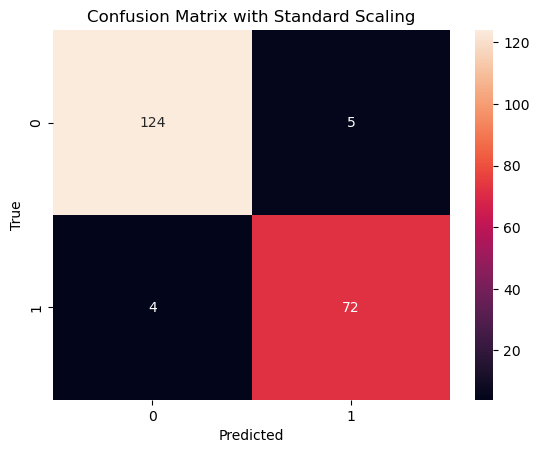

In [28]:
cm_log = confusion_matrix(y_pred_log_ss, y_test)
sns.heatmap(cm_log, annot=True, fmt='g').set(title='Confusion Matrix with Standard Scaling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

It is seen in the confusion matrix above that the false negatives are 4 and false positives are 5.

The second confusion matrix shows the metrics of logistic regression with minmax scaling.

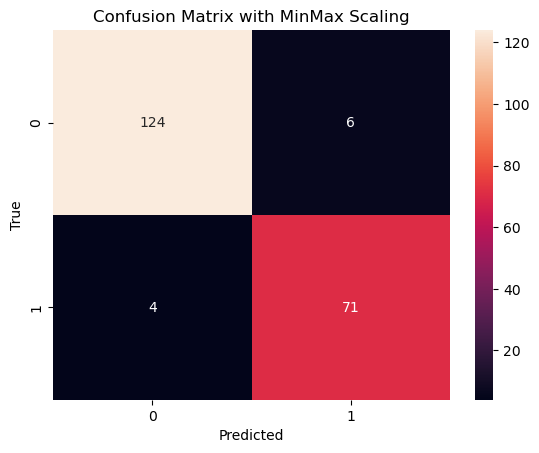

In [29]:
cm_log_minmax = confusion_matrix(y_pred_log_minmax, y_test)
sns.heatmap(cm_log_minmax, annot=True, fmt='g').set(title='Confusion Matrix with MinMax Scaling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

It is seen in the confusion matrix above that the false negatives are also 4, but false positives are 6.

The number of false negatives for logistic regression with standard scaling or minmax sclaing is the same which is 4. However, the false postives for standard scaling is 6 compared to 5 for minmax scaling.

Thus, confirming that using standard scaling for this problem yeilds better outcome predictions.

## 7.2. Naïve Bayes Classification

Then, the Naïve Bayes model is fit with the standard scaled data as training data and predicted the standard scaled testing data.

#### Using Standard Scaling

In [30]:
classifier_gaussian = GaussianNB()
classifier_gaussian.fit(x_train_ss, y_train)
y_pred_gaussian_ss = classifier_gaussian.predict(x_test_ss)

accuracy_gaussian_ss = metrics.accuracy_score(y_pred_gaussian_ss, y_test)
precision_gaussian_ss = metrics.precision_score(y_pred_gaussian_ss, y_test)
recall_gaussian_ss = metrics.recall_score(y_pred_gaussian_ss, y_test)
auc_gaussian_ss = metrics.roc_auc_score(y_pred_gaussian_ss, y_test)

print("Accuracy : %s" % "{0:.3%}".format(accuracy_gaussian_ss))
print("Precision : %s" % "{0:.3%}".format(precision_gaussian_ss))
print("Recall : %s" % "{0:.3%}".format(recall_gaussian_ss))
print("AUC : %s" % "{0:.3%}".format(auc_gaussian_ss))

Accuracy : 96.098%
Precision : 97.403%
Recall : 92.593%
AUC : 95.490%


All metrics showed very good results same as before and the model wasn't overfitting.

The recall score was 92.593%

Below is a classification report that shows the full metrics of the Naïve Bayes model with standard scaling.

In [31]:
 print(metrics.classification_report(y_test, y_pred_gaussian_ss))  

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       128
           1       0.93      0.97      0.95        77

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



The **recall** metric was 0.95 for label '0' and 0.97 for label '1' averaging to a 0.96.

#### Using MinMax Scaling

The Naïve Bayes model is then fit with the minmax scaled data as training data and predicted the minmax scaled testing data.

In [32]:
classifier_gaussian = GaussianNB()
classifier_gaussian.fit(x_train_minmax, y_train)
y_pred_gaussian_minmax = classifier_gaussian.predict(x_test_minmax)

accuracy_gaussian_minmax = metrics.accuracy_score(y_pred_gaussian_minmax, y_test)
precision_gaussian_minmax = metrics.precision_score(y_pred_gaussian_minmax, y_test)
recall_gaussian_minmax = metrics.recall_score(y_pred_gaussian_minmax, y_test)
auc_gaussian_minmax = metrics.roc_auc_score(y_pred_gaussian_minmax, y_test)

print("Accuracy : %s" % "{0:.3%}".format(accuracy_gaussian_minmax))
print("Precision : %s" % "{0:.3%}".format(precision_gaussian_minmax))
print("Recall : %s" % "{0:.3%}".format(recall_gaussian_minmax))
print("AUC : %s" % "{0:.3%}".format(auc_gaussian_minmax))

Accuracy : 96.098%
Precision : 97.403%
Recall : 92.593%
AUC : 95.490%


The metrics for minmax scaling are exactly equal to the metrics for standard scaling.

In [33]:
 print(metrics.classification_report(y_test, y_pred_gaussian_minmax))  

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       128
           1       0.93      0.97      0.95        77

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



The **recall** metric was same as before which was 0.95 for label '0' and 0.97 for label '1' averaging to a 0.96.

It is deduced that scaling won't affect Naïve Bayes models. This could be the case, because Naïve Bayes models use probabilty to classify objects. 

The recall score for Naïve Bayes models was 92.593% compared to 94.737% for Logistic Regression model with standard scaling. Therefore, it looks like using Logistic Regression models yields better recall than Naïve Bayes models.

### 7.2.1 Confusion Matrix for Naïve Bayes Classification

To get a better understanding, the number of false negatives and positives needs to be compared to know for sure.

The first confusion matrix shows the metrics of Naïve Bayes with standard scaling.

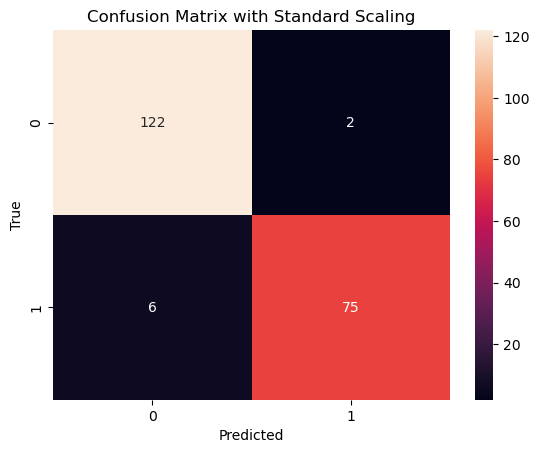

In [34]:
cm_gaussian = confusion_matrix(y_pred_gaussian_ss, y_test)
sns.heatmap(cm_gaussian, annot=True, fmt='g').set(title='Confusion Matrix with Standard Scaling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The second confusion matrix shows the metrics of Naïve Bayes with minmax scaling.

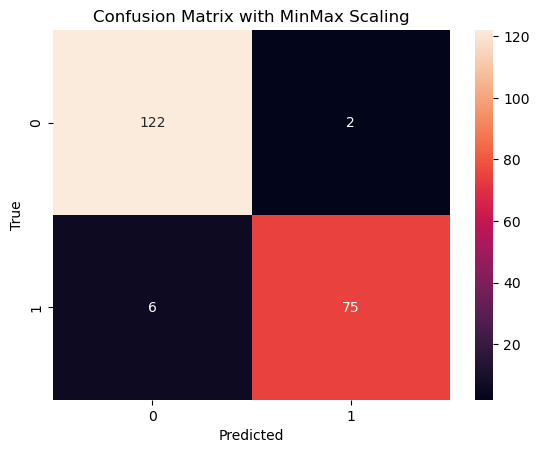

In [35]:
cm_gaussian = confusion_matrix(y_pred_gaussian_minmax, y_test)
sns.heatmap(cm_gaussian, annot=True, fmt='g').set(title='Confusion Matrix with MinMax Scaling')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Both confusion matrices are the same.

The number of false negatives for Naïve Bayes with standard scaling or minmax scaling is 6, and the number of false positives is 2.

A first insight is detected! This confirms that Naïve Bayes models yeilds better precision than Logistic Regression with standard scaling, since number of false positives was 2 for the Naïve Bayes model and 5 for the Logistic Regression model with standard scaling. Moreover, Logistic Regression with standard scaling yeilds better recall than Naïve Bayes models, since number of false negatives was 4 for the Logistic Regression model with standard scaling and 6 for the Naïve Bayes model. 

## 7.3. Precision-Recall Curve for Both Classifiers

To understand how the precision and recall would vary with respect to each other, a precision-recall curve for both models and both scaling methods is plotted using matplotlib. 

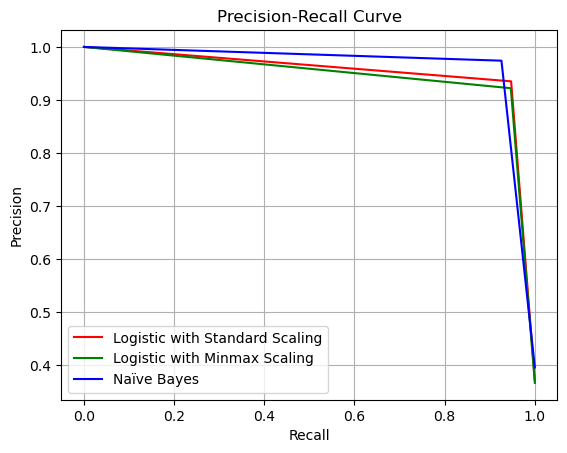

In [36]:
precision_log_ss, recall_log_ss, thresholds_log_ss = metrics.precision_recall_curve(y_pred_log_ss, y_test)
precision_log_minmax, recall_log_minmax, thresholds_log_minmax = metrics.precision_recall_curve(y_pred_log_minmax, y_test)
precision_gaussian, recall_gaussian, thresholds_gaussian = metrics.precision_recall_curve(y_pred_gaussian_ss, y_test)

plt.plot(recall_log_ss, precision_log_ss, label=f'Logistic with Standard Scaling', color='r')
plt.plot(recall_log_minmax, precision_log_minmax, label=f'Logistic with Minmax Scaling', color='g')
plt.plot(recall_gaussian, precision_gaussian, label=f'Naïve Bayes', color='b')

plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid(True)
plt.legend()
plt.show()

It is seen from the curve that as recall gets higher, precision gets lower, and vice versa.

The Logistic Regression model with standard scaling outperforms the Logistic Regression model with minmax scaling. This confirms the insight mentioned before that using standard scaling is the better option. Moreover, Naïve Bayes outperfroms Logistic when it comes to precision, but Logistic outperforms Gaussian when it comes to Recall. 

## 7.4. ROC Curve for Both Classifiers

Another metric used to compare the models is the ROC-AUC curve. The curve is plotted using metrics ```roc_curve()``` and matplotlib

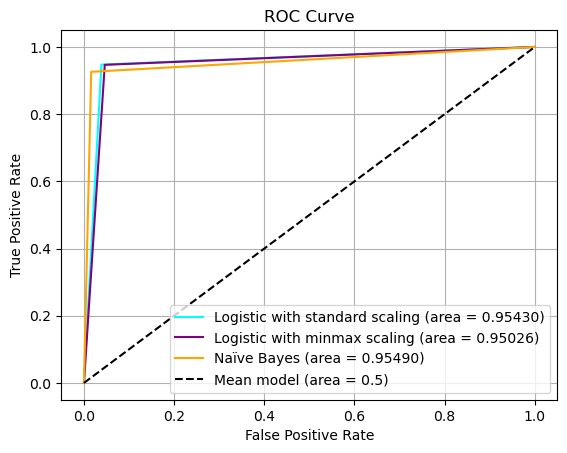

In [37]:
fpr_log_ss, tpr_log_ss, _ = metrics.roc_curve(y_pred_log_ss, y_test)
fpr_log_minmax, tpr_log_minmax, _ = metrics.roc_curve(y_pred_log_minmax, y_test)
fpr_gaussian, tpr_gaussian, _ = metrics.roc_curve(y_pred_gaussian_ss, y_test)

# plot the roc curve for the model
plt.plot(fpr_log_ss, tpr_log_ss, label=f'Logistic with standard scaling (area = {auc_log_ss:0.5f})', color='cyan')
plt.plot(fpr_log_minmax, tpr_log_minmax, label=f'Logistic with minmax scaling (area = {auc_log_minmax:0.5f})', color='purple')
plt.plot(fpr_gaussian, tpr_gaussian, label=f'Naïve Bayes (area = {auc_gaussian_ss:0.5f})', color='orange')
plt.plot([0, 1], [0, 1], label="Mean model (area = 0.5)", color="black", linestyle="--", )  

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

From the figures shown above, it is deduced that the Naïve Bayes model had higher AUC (0.95490) than both Logistic models (0.95430 & 0.95026). Thus, Naïve Bayes classifier is able to know the postives from the negatives better than the Logistic models. The mean model is there to show that the models are working perfectly fine and are able to predict true values most of the time.

# 8. Cross Validation

Before conluding this problem, a cross validation method is implemented to make sure the models will work perfectly fine if it was tested on different chunks of data. For this cross validation,  a 5 fold split was done so that the data will be seperated into 5 chunks, where 4 random chunks are for training and the rest are for testing. [12]

## 8.1. Use 5 Splits

To use cross validation, sklearn ```kfold``` and ```cross_validate()``` were used. The splits were shuffled so that the data would be random.

In [38]:
kfold = KFold(n_splits=5, shuffle=True, random_state=99)
scoring = ['accuracy', 'precision', 'recall', 'roc_auc']

The orginal data **X** and **Y** are used in the cross validation with 5 folds. This data is before it was scaled. Not scaling will not affect Naïve Bayes model, but it will affect the Logistic Model.

First, a cross validation method is performed on the Logistic Model, where the accuracy, precision, recall, and roc_auc.

In [39]:
result_log = cross_validate(classifier_log, X, Y, cv=kfold, scoring=scoring)
result_log

{'fit_time': array([0.01496124, 0.00897431, 0.01196909, 0.01396346, 0.01895118]),
 'score_time': array([0.00797844, 0.00498819, 0.00698185, 0.0099721 , 0.00797677]),
 'test_accuracy': array([0.94160584, 0.97080292, 0.95620438, 0.98529412, 0.95588235]),
 'test_precision': array([0.92682927, 0.95555556, 0.95918367, 0.96153846, 0.95833333]),
 'test_recall': array([0.88372093, 0.95555556, 0.92156863, 1.        , 0.92      ]),
 'test_roc_auc': array([0.99208313, 0.99178744, 0.99635203, 0.99813953, 0.99348837])}

Second, a cross validation method is performed on the Naïve Bayes Model, where the accuracy, precision, recall, and roc_auc.

In [40]:
result_gaussian = cross_validate(classifier_gaussian, X, Y, cv=kfold, scoring=scoring)
result_gaussian

{'fit_time': array([0.00598884, 0.00298667, 0.00199437, 0.00199485, 0.00199366]),
 'score_time': array([0.00897694, 0.01096869, 0.00499201, 0.00698066, 0.00498676]),
 'test_accuracy': array([0.94160584, 0.96350365, 0.95620438, 0.98529412, 0.97058824]),
 'test_precision': array([0.88888889, 0.91666667, 0.9245283 , 0.96153846, 0.92592593]),
 'test_recall': array([0.93023256, 0.97777778, 0.96078431, 1.        , 1.        ]),
 'test_roc_auc': array([0.98602177, 0.99178744, 0.98404013, 0.99372093, 0.99139535])}

## 8.2. Plot All Folds Performance

For better understanding and comparisons, barplots is plotted using matplotlib to compare the metrics of both models.

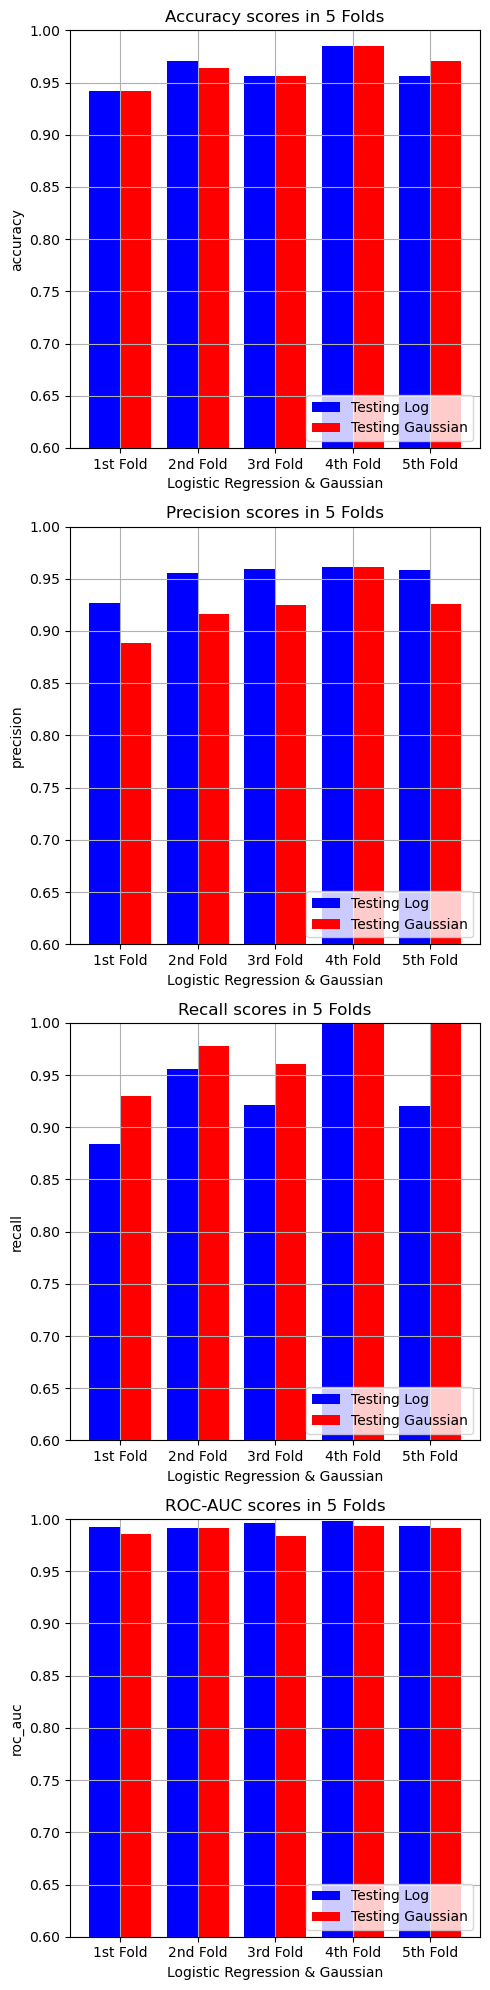

In [41]:
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
val = ["test_accuracy", "test_precision", "test_recall", "test_roc_auc"]
titles = ["Accuracy scores in 5 Folds", "Precision scores in 5 Folds", "Recall scores in 5 Folds", "ROC-AUC scores in 5 Folds"]
X_axis = np.arange(len(labels))
fig, axs = plt.subplots(4, 1, figsize=(5,20), tight_layout=True)
for i,ax in enumerate(axs):
    ax.bar(X_axis-0.2, result_log[val[i]], 0.4, color='blue', label='Testing Log')
    ax.bar(X_axis+0.2, result_gaussian[val[i]], 0.4, color='red', label='Testing Gaussian')
    ax.set_title(titles[i])
    ax.set_xticks(X_axis, labels)
    ax.set_xlabel("Logistic Regression & Gaussian")
    ax.set_ylabel(scoring[i])
    ax.grid(True)
    ax.set_ylim(0.6,1)
    ax.legend(loc='lower right')
plt.show()    

From the plots above, a comparison can be made for every metric between the two models:

1. **Accuracy**: The accuracy was great for all 5 folds for both models and there was no overfitting. Thus, the models can predict accurate values most of the time.
2. **Precision**: The precision metric for Logistic Model was better in 4 of the 5 folds. Thus, with no scaling, the logistic model is more precise when it comes to true positives.
3. **Recall**: The precision metric for Naïve Bayes Model was better in 4 of the 5 folds. The 4th fold showed a recall of 1 for both models, which could be due to overfitting the data. Thus, the Naïve Bayes model has better recall if the data wasn't scaled.
4. **ROC-AUC**: The ROC-AUC metric for Logistic Model was better in 4 of the 5 folds. This could mean that Logistic model has better prediction scores if the data was not scaled. 

# 9. Conclusion

In conlcusion, to get the best out of classifiers, the data should be scaled in order to not have many variations in the output. In this dataset "cancerdata.csv", the data was already clean and close to each other. This is why it didnt affect much the logistic model. The logistic and Naïve Bayes models were tested on with and without scaling. 

Moreover, for scaling, two different methods, standard and minmax scaling, were used to find out which one was better. A conlusion was made that using standard scaling is better for this dataset as the data could be more normally distributed. Moreover, another conlcusion was made is that scaling won't affect Naïve Bayes classifiers, since the classifier uses probabilities.

1. ***Logistic Regression Model***: The model performed better when it comes to scaling the data first. It showed better recall than Naïve Bayes model as this is the main concern. Getting the better recall will show better outcome to detecting cancer or not. The problem is a life-threatining problem, so there is no room for error. 
2. ***Naïve Bayes Model***: The model performed better when it comes to not scaling the data first as seen in the cross validation section. It showed better recall than the logistic model. 

# Bibliography

[1] “Breast cancer prediction,” kaggle.com. https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction/notebook (accessed Jan. 03, 2023).

[2] R. Sidhu, “Understanding ML Evaluation Metrics — Precision & Recall,” AI Graduate, Jun. 21, 2019. https://medium.com/x8-the-ai-community/understanding-ml-evaluation-metrics-precision-recall-2b3fb915b666 (accessed Jan. 03, 2023).

[3] D. K, “Why Naive Bayes Algorithm is NOT affected by Feature Scaling,” Medium, Jan. 26, 2021. https://dhirajkumarblog.medium.com/why-naive-bayes-algorithm-is-not-affected-by-feature-scaling-c9362b5e551b (accessed Jan. 03, 2023).

[4] “sklearn.preprocessing.MinMaxScaler — scikit-learn 0.22.1 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

[5] “sklearn.preprocessing.StandardScaler — scikit-learn 0.21.2 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[6] J. Brownlee, “How to Use StandardScaler and MinMaxScaler Transforms in Python,” Machine Learning Mastery, Jun. 09, 2020. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

[7] A. McDonald, “Seaborn Pairplot — Enhance your Data Understanding With a Single Plot,” Medium, Jul. 29, 2022. https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us (accessed Jan. 03, 2023).

[8] R. Gandhi, “Naive Bayes Classifier,” Medium, May 17, 2018. https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c#:~:text=A%20Naive%20Bayes%20classifier%20is

[9] Saishruthi Swaminathan, “Logistic Regression — Detailed Overview,” Medium, Mar. 15, 2018. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

[10] A. Shafi, “How to Learn the Definitions of Precision and Recall (For Good),” Medium, Apr. 19, 2022. https://towardsdatascience.com/precision-and-recall-88a3776c8007

[11] “How to Implement K fold Cross-Validation in Scikit-Learn,” Engineering Education (EngEd) Program | Section. https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/#:~:text=K%2Dfold%20cross%2Dvalidation%20is (accessed Jan. 03, 2023).

[12] S. Mohapatra, “Model Validation | Validation of Classification Models,” Analytics Vidhya, Jan. 11, 2021. https://www.analyticsvidhya.com/blog/2021/01/validation-of-classification-model/

[13] P. Pushp, “Model Validation for Classification,” Analytics Vidhya, Apr. 24, 2020. https://medium.com/analytics-vidhya/model-validation-for-classification-5ff4a0373090

[14] “How to Evaluate Classification Models,” Edlitera. https://www.edlitera.com/blog/posts/evaluating-classification-models#mcetoc_1ga47ipak20 (accessed Jan. 03, 2023).

[15] “seaborn.pairplot — seaborn 0.10.1 documentation,” seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.pairplot.html

[16] M. Waskom, “seaborn.countplot — seaborn 0.9.0 documentation,” Pydata.org, 2012. https://seaborn.pydata.org/generated/seaborn.countplot.html

[17] Zach, “How to Create a Precision-Recall Curve in Python,” Statology, Sep. 09, 2021. https://www.statology.org/precision-recall-curve-python/ (accessed Sep. 06, 2022).

[18] J. Brownlee, “How to Use ROC Curves and Precision-Recall Curves for Classification in Python,” MachineLearningMastery.com, Aug. 30, 2018. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=A%20precision%2Drecall%20curve%20is (accessed Jan. 03, 2023).

[19] R. Vickery, “8 Metrics to Measure Classification Performance,” Medium, Dec. 08, 2021. https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa

[20] “Precision-Recall — scikit-learn 0.21.3 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

[21] “3.3. Metrics and scoring: quantifying the quality of predictions — scikit-learn 0.22.1 documentation,” scikit-learn.org. https://scikit-learn.org/stable/modules/model_evaluation.html

[22] “Naive Bayes Classifier Tutorial: with Python Scikit-learn,” www.datacamp.com. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

[23] D. T, “Confusion Matrix Visualization,” Medium, Jul. 25, 2019. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

[24] T. Team, “Breast Cancer Classification using Machine Learning,” TechVidvan, Aug. 12, 2021. https://techvidvan.com/tutorials/breast-cancer-classification/ (accessed Jan. 03, 2023).

[25] vishabh goel, “Building a Simple Machine Learning Model on Breast Cancer Data,” Medium, Sep. 29, 2018. https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3

[26] SciKit-Learn, “3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.21.3 documentation,” Scikit-learn.org, 2009. https://scikit-learn.org/stable/modules/cross_validation.html